In [ ]:
### 🔧 TAREA
#Antes de entrenar la red neuronal, modifica los hiperparámetros en `config.yaml`, especialmente:
#- `hidden_layers`: cambia el número de capas o neuronas.
#- `activation`: prueba funciones como `tanh` o `elu`.
#- `epochs`: aumenta o reduce el número de épocas.
#
#Luego, vuelve a ejecutar este notebook y observa cómo cambia el rendimiento.

In [1]:
import os
print(os.getcwd())

import sys
sys.path.append("../src")

import train
import model
import utils
import evaluate as ev
import pandas as pd
import numpy as np
import yaml

c:\Users\jota_\OneDrive\Escritorio\Magister\Deep Learning\DeepNeuralNetworkUSS\Projects\Credit\notebooks


In [ ]:
# 🔧 Cargar configuración
config = train.load_config("../config.yaml")

# 📦 Cargar y preparar los datos
X, y = train.load_data("../data/credit_clean_wo_outliers.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

In [3]:
# 🧠 Construir el modelo
input_dim = X_train.shape[1]
nn_model = model.build_model(config, input_dim)

C:\Users\jota_\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 🚀 Entrenar el modelo
history = train.train_model(nn_model, X_train, y_train, config)

Epoch 1/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7072 - loss: 0.6363 - val_accuracy: 0.7158 - val_loss: 0.5932
Epoch 2/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.7411 - loss: 0.5671 - val_accuracy: 0.7260 - val_loss: 0.5735
Epoch 3/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.7477 - loss: 0.5480 - val_accuracy: 0.7388 - val_loss: 0.5495
Epoch 4/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.7550 - loss: 0.5324 - val_accuracy: 0.7500 - val_loss: 0.5380
Epoch 5/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.7568 - loss: 0.5257 - val_accuracy: 0.7475 - val_loss: 0.5358
Epoch 6/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.7620 - loss: 0.5201 - val_accuracy: 0.7557 - val_loss: 0.5309
Epoch 7/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.7612 - loss: 0.5198 - val_accuracy: 0.7541 - val_loss: 0.5269
Epoch 8/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.7626 - loss: 0.5183 - va

In [5]:
# 💾 Guardar modelo entrenado
utils.save_model(nn_model, path="../models/nn_model.keras")

✅ Modelo guardado en ../models/nn_model.keras


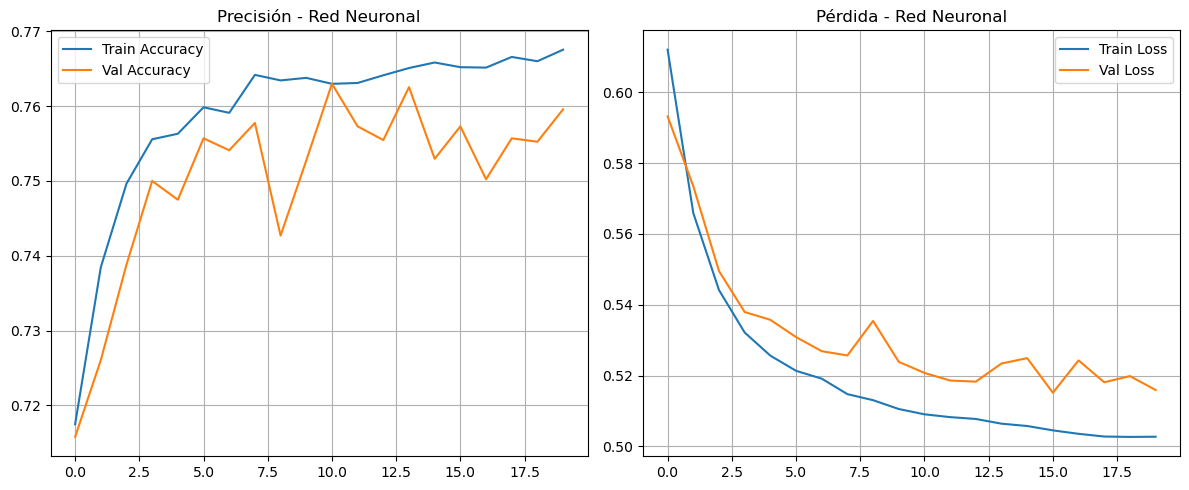

In [6]:
# 📈 Visualizar evolución del entrenamiento
utils.plot_training_history(history, model_name="Red Neuronal")

In [8]:
### 📊 Pregunta de reflexión
# ¿Ves signos de sobreajuste en las curvas de pérdida o precisión?  

# R: Ambas curvas en el grafico de presicion de la red neuronal aumentan a la par hasta cierto punto donde la curva de validacion se estanca y comienza a 
# oscilar, tambien ocurre lo mismo en el grafico de pérdida por lo que podria indicar que el modelo empieza a memorizar los datos de entrenamiento en lugar de generalizar.

# ¿Cuál fue la época donde la validación alcanzó su mejor punto?  

# R: En la epoca 9

# ¿Qué pasaría si entrenaras con más (o menos) datos?

# R: con mas datos, el modelo podria generalizar de mejor forma y asi evitar el sobreajuste
# con menos datos, el modelo memorizar los datos aun mas rapido por lo que el modelo fallaría antes.

En el archivo RedNeuronal-Dropout, ejecutaré el analisis con el model.py modificado para agregar la capa Dropout para mejorar la generalización del modelo.